In [7]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
# Importing dataset

ds = pd.read_csv("Social_network_Ads.csv")

In [9]:
# Searching for duplicates

ds.duplicated().sum()

np.int64(33)

In [10]:
# Remove duplicates

ds.drop_duplicates(inplace = True)

In [11]:
# Cheaking for missing values

ds.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [12]:
ds.columns

Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [13]:
# Split data as Independent and Dependent variable

X = ds[["Age","EstimatedSalary"]]
y = ds[["Purchased"]]

In [14]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [15]:
# Model Selection and Model Fitting with train test data

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25 ,random_state = 0)

In [16]:
# Applying decision tree algorithm

from sklearn.tree import DecisionTreeClassifier
cls = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
cls.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


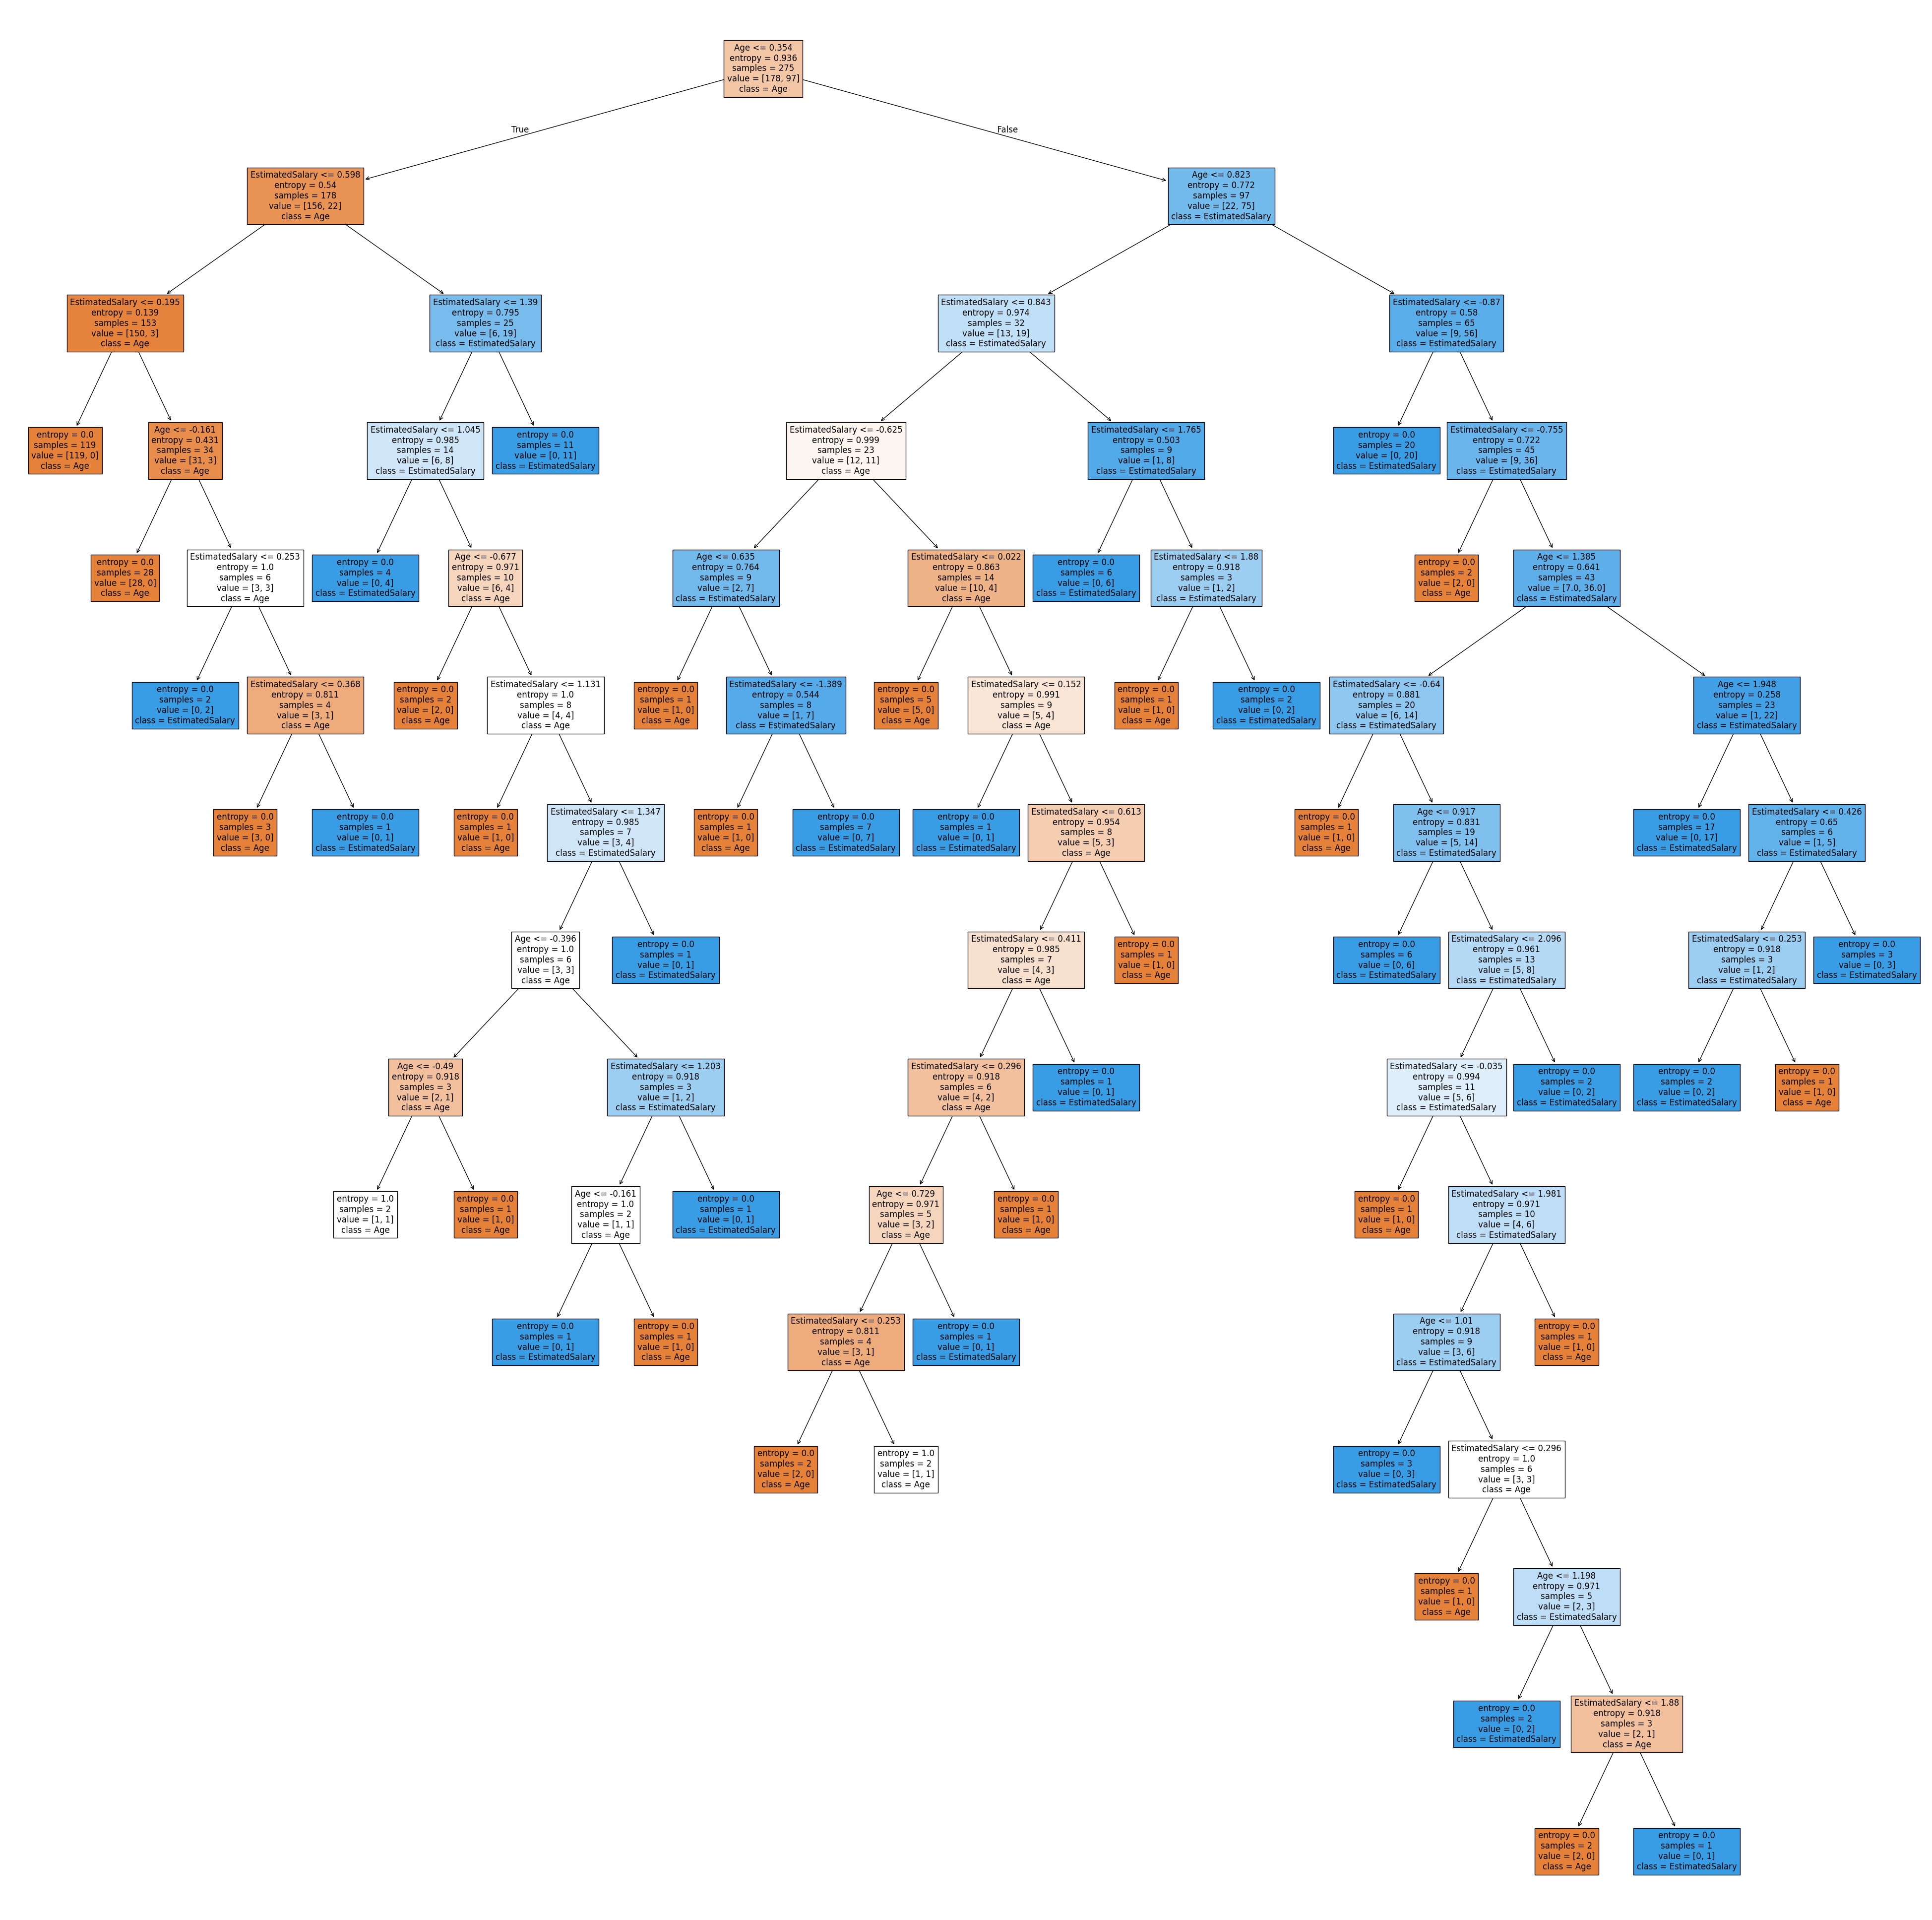

In [17]:
# Plot for decision tree 

from sklearn.tree import plot_tree

plt.figure(figsize=(50,50))
plot_tree(cls, filled=True, feature_names=['Age','EstimatedSalary'], class_names=['Age','EstimatedSalary'])
plt.show()

In [18]:
# Predict for my input

result = cls.predict(sc.transform([[30, 150000]]))
result

array([1])

In [19]:
# Accuracy of prediction   (prompt to cGPT is training testing model fitting and decision tree algorithm)

from sklearn.metrics import accuracy_score

y_pred = cls.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 82.61%


In [21]:
# User Input

age = float(input("Enter Age: "))
salary = float(input("Enter Estimated Salary: "))

myinput = pd.DataFrame(sc.transform([[age, salary]]), columns=['Age', 'EstimatedSalary'])

result = cls.predict(myinput)

if result[0] == 1:
    print("Prediction: User will purchase plan")
else:
    print("Prediction: User will not purchase plan")

Enter Age:  45
Enter Estimated Salary:  56000


Prediction: User will not purchase plan
